## Red Wine Quality Project

In this project, we aim to analyze the red wine data and find out factors that contributes to its quality

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read CSV file

In [2]:
wine = pd.read_csv("winequality-white.csv", delimiter=";")

In [3]:
wine.head() # check the first five row

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
wine.tail() # check the last five row

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Based on the information above, there is no null value in this dataset.

In [6]:
# De-duplication
wine.drop_duplicates(inplace=True)
wine.shape

(3961, 12)

After dropping some duplicates, we now have 3961 data instead of 4898

In [7]:
# Some basic statistics of the dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


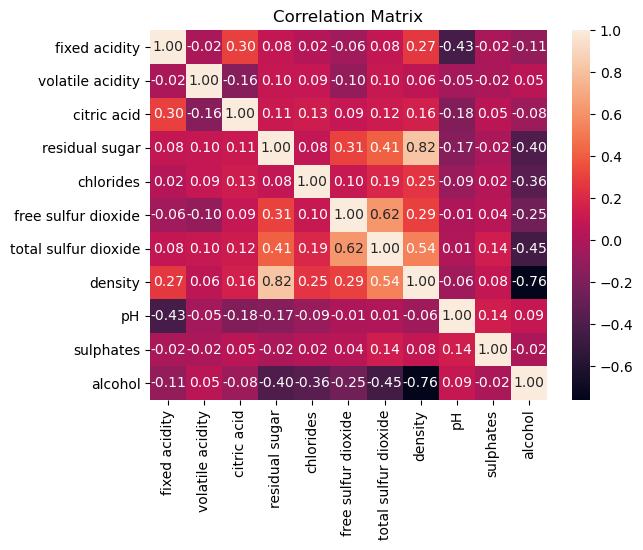

In [8]:
corr_matrix = wine.iloc[:, :-1].corr()
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

We use the correlation to detect colliearity; we can see some features have high correlation. One of the them might be dropped in later machine learning task

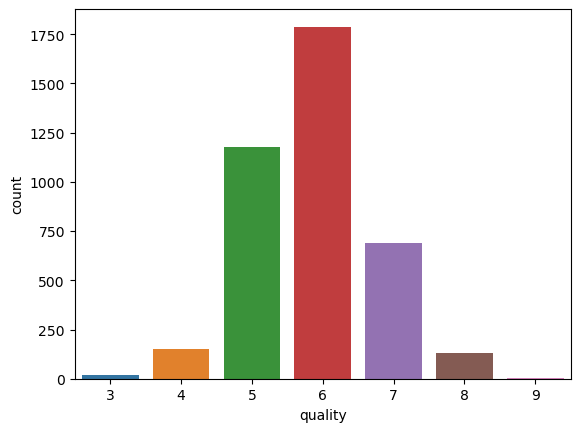

In [9]:
sns.countplot(data=wine, x="quality")
plt.show()

We can see that the data is heavily imbalanced. This places one of the difficulties in this project.

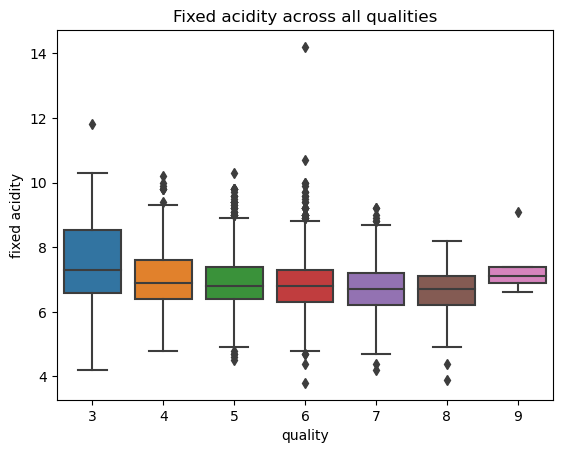

In [10]:
plt.title("Fixed acidity across all qualities")
sns.boxplot(data=wine, x="quality", y="fixed acidity")
plt.show()

From the boxplot, we can see that there is some difference of fixed acidity between different quality. However, more tests need to be done to verify that.

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
wine.rename(columns={"fixed acidity": "fixed_acidity"}, inplace="True")
lm = ols('fixed_acidity ~ C(quality, Sum)',data=wine).fit()
table = sm.stats.anova_lm(lm, typ=1) # Type 1 Anova DataFrame
table

,df,sum_sq,mean_sq,F,PR(>F)
"C(quality, Sum)",4.0,42.486708,10.621677,14.601739,7.660460e-12
Residual,3931.0,2859.509633,0.727425,NaN,NaN


From the F-score above, we can determine that different wine quality contribute to difference in fixed acidity. Hence, fixed acidity could play a role on classifying wine quality.